# Librerias y recursos

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



# I. Se quiere conocer dónde residían habitualmente personas entre 30 y 40 años cuyo fallecimiento se reportó en Querétaro. 


In [2]:
#leemos datos limpios
MQueretaro=pd.read_csv("Pregunta1.csv")
MQueretaro["CLAVE"]=MQueretaro["CLAVE"].astype(str).str.zfill(5)


In [3]:
#objetos geopandas a partir de shapefile
mx = gpd.read_file('mapa_mexico/')\
        .to_crs(epsg=4485)

In [4]:
#cruzamos mapa con datos
mx=mx.merge(MQueretaro,on="CLAVE", how="left")

In [5]:
#Notamos que el cumulo de fallecimientos se encuentran en el mismo estado de Querétaro
edos=mx.dissolve(by='CVE_EDO')
quer=edos.query('CVE_EDO=="22"')

Dado que el cúmulo de fallecimientos reportados en Querétaro provienen del mismo estado, procedemos a ampliar nuestra vista sobre el estado para observar su comportamiento por municipios.

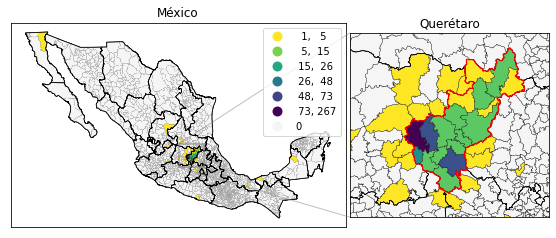

In [11]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
#contorno municipios
mx.plot(ax=ax,edgecolor="black")
#datos
mx.plot(ax=ax, column='Cuenta', legend=True, scheme='natural_breaks', k=6, cmap='viridis_r'
        ,missing_kwds={'color': 'whitesmoke', 'label': '0'}
        ,legend_kwds={'loc': 'upper right', 'fmt': "{:.0f}"})
#contorno estados
edos.boundary.plot(lw=.7, color="black",ax=ax)
#escala y titulo
ax.set(xticks=[], yticks=[], title='México')

#subplot
axins = ax.inset_axes([0.86, 0.05, 0.9, 0.9])
##queretaro
mx.plot(column='Cuenta', legend=False, ax=axins, scheme='natural_breaks',
        k=5, cmap='viridis_r',
        missing_kwds={'color': 'whitesmoke'})
##contornos
mx.boundary.plot(lw=0.25, color='k', ax=axins)
edos.boundary.plot(lw=.6, color="black",ax=axins)
quer.boundary.plot(lw=1.2, color='red', ax=axins)
##ampliación
axins.set(ylabel='', xlabel='', xlim=(1515000, 1780000), ylim=(2219203, 2463767), xticks=[], yticks=[], title="Querétaro")
ax.indicate_inset_zoom(axins, lw=2)
#plot
plt.savefig('Pregunta1_Mapa2.jpg', dpi=400,bbox_inches='tight')
plt.show()

# IV. Considerando Edad y Sexo, y de acuerdo a la lista Mexicana, ¿En qué Entidad Federativa fallecen más por enfermedad de VIH? ¿Encuentras alguna relación o patrón?

In [7]:
#leemos datos limpios
VIH=pd.read_csv("Pregunta4.csv")
VIH["CVE_EDO"]=VIH["CVE_EDO"].astype(str).str.zfill(2)

In [8]:
#cruzamos mapa con datos
edos=edos.merge(VIH,on="CVE_EDO", how="left")

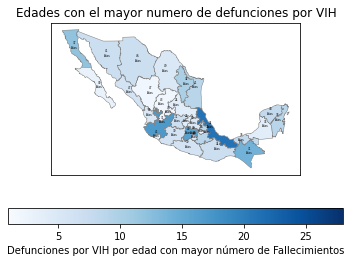

In [12]:
#muertes máximas por VIH
fig, ax4 = plt.subplots(1,1)
ax4.set_aspect('equal')
edos.plot(ax=ax4, edgecolor='gray', lw=.5, column='MAX_DEF', legend=True,cmap='Blues',
          legend_kwds={'label': "Defunciones por VIH por edad con mayor número de Fallecimientos",'orientation': "horizontal", 'fmt': "{:.0f}"},
         vmin=1,vmax=28)
# edades con maximo de muertes por VIH
edos['coords'] = edos['geometry'].apply(lambda x: x.representative_point().coords[:])
edos['coords'] = [coords[0] for coords in edos['coords']]
for idx, row in edos.iterrows():
    plt.annotate(text=str(row['Edad'])+'\n'+'Años', xy=row['coords'],
                 horizontalalignment='center',
                 fontsize=2.8)
#titulo
ax4.set(xticks=[], yticks=[], title='Edades con el mayor numero de defunciones por VIH')
plt.savefig('Pregunta4_Mapa3.jpg', dpi=400,bbox_inches='tight')
plt.show()